In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import trimesh

scene = trimesh.Scene()

In [1]:
import my_code.datasets.surreal_cached_train_dataset as surreal_cached_train_dataset

dataset = surreal_cached_train_dataset.SurrealTrainDataset(
    base_folder='/home/s94zalek_hpc/shape_matching/data/SURREAL_full/full_datasets/dataset_SURREAL_train_withAug_productSuppCond_32/train',
    fmap_input_type='orig',
    conditioning_types={'evals_inv'},
)

Train dataset, functional map dimension: 32


In [5]:
dataset[10][1]

tensor([[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2150, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1626,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0028, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0027, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0027]]])

IndexError: index 1 is out of bounds for dimension 0 with size 1

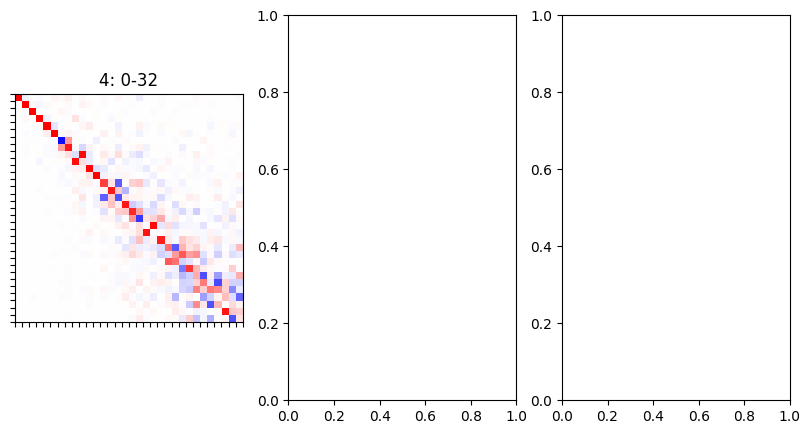

In [4]:
import my_code.utils.plotting_utils as plotting_utils

l = 0
h = 32

fig, axs = plt.subplots(1, 3, figsize=(10, 5))


idx = 4
x, y = dataset[idx]

plotting_utils.plot_Cxy(fig, axs[0], x[0],
                        f'{idx}', l, h, show_grid=False, show_colorbar=False)
plotting_utils.plot_Cxy(fig, axs[1], y[1],
                        f'{idx}', l, h, show_grid=False, show_colorbar=False)
plotting_utils.plot_Cxy(fig, axs[2], y[2],
                        f'{idx}', l, h, show_grid=False, show_colorbar=False)



plt.show()

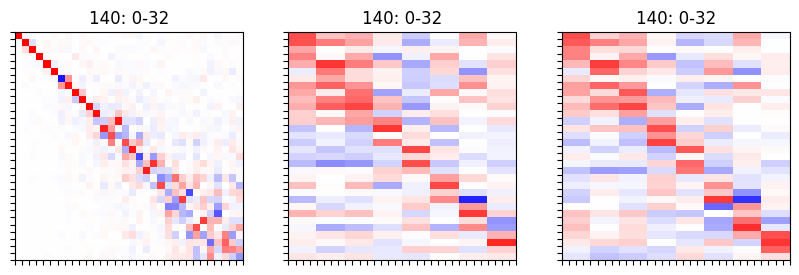

In [18]:
x.shape, y.shape

(torch.Size([1, 32, 32]), torch.Size([3, 32, 32]))

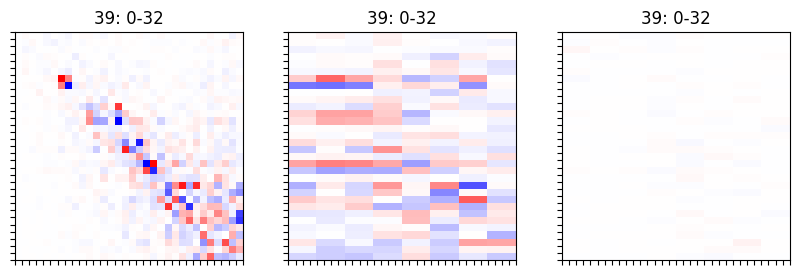

In [16]:
import my_code.utils.plotting_utils as plotting_utils

l = 0
h = 32

fig, axs = plt.subplots(1, 3, figsize=(10, 5))


idx = 39
x_0, y_0 = dataset[idx]

idx_1 = 146
x_1, y_1 = dataset[idx_1]

plotting_utils.plot_Cxy(fig, axs[0], x_0[0] - x_1[0],
                        f'{idx}', l, h, show_grid=False, show_colorbar=False)
plotting_utils.plot_Cxy(fig, axs[1], y_0[2] - y_1[2],
                        f'{idx}', l, h, show_grid=False, show_colorbar=False)
plotting_utils.plot_Cxy(fig, axs[2], y_0[1] - y_1[1],
                        f'{idx}', l, h, show_grid=False, show_colorbar=False)

plt.show()

In [21]:
y[0]

tensor([[6.8899e-05, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 4.4462e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 5.2486e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.4844e+02, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 3.5655e+02,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         3.6737e+02]])

In [26]:
1 / y[0].diag()

tensor([1.4514e+04, 2.2491e-01, 1.9053e-01, 1.2105e-01, 8.3553e-02, 5.8283e-02,
        3.1455e-02, 2.7282e-02, 1.9036e-02, 1.8189e-02, 1.2644e-02, 1.2376e-02,
        9.8524e-03, 8.2614e-03, 8.1255e-03, 6.9832e-03, 6.5130e-03, 5.7606e-03,
        4.9335e-03, 4.6256e-03, 4.3441e-03, 4.0186e-03, 3.9247e-03, 3.7127e-03,
        3.6059e-03, 3.3996e-03, 3.3307e-03, 3.2469e-03, 3.0006e-03, 2.8700e-03,
        2.8046e-03, 2.7220e-03])

In [28]:
y_inv

tensor([1.0000, 0.2249, 0.1905, 0.1210, 0.0836, 0.0583, 0.0315, 0.0273, 0.0190,
        0.0182, 0.0126, 0.0124, 0.0099, 0.0083, 0.0081, 0.0070, 0.0065, 0.0058,
        0.0049, 0.0046, 0.0043, 0.0040, 0.0039, 0.0037, 0.0036, 0.0034, 0.0033,
        0.0032, 0.0030, 0.0029, 0.0028, 0.0027])

In [30]:
y_inv = 1 / y[0]
# replace elements > 1 with 1
y_inv[y_inv > 1] = 1

y_inv
# plt.plot(y_inv)

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 0.2249, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.1905,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.0029, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.0028, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.0027]])